In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('risk_domain_accuracies.csv')

In [87]:
df.head()


,Risk domain,Claude Sonnet,GPT-3.5,Mistral Large,Mistral 8x22B,Mistral 8x7B
0,Laboratory,67.80,49.2,62.70,66.1000,44.10
1,Cybersecurity,81.25,25.0,62.50,56.2500,12.50
2,Terrorism,57.10,28.6,42.86,71.4000,28.60
3,Natural disasters,85.70,14.3,80.00,53.3000,46.67
4,Biohazards,37.50,10.4,34.60,33.6525,20.20


In [88]:
df = df.set_index('Risk domain')

In [89]:
df

,Claude Sonnet,GPT-3.5,Mistral Large,Mistral 8x22B,Mistral 8x7B
Risk domain,,,,,
Laboratory,67.80,49.2,62.70,66.1000,44.10
Cybersecurity,81.25,25.0,62.50,56.2500,12.50
Terrorism,57.10,28.6,42.86,71.4000,28.60
Natural disasters,85.70,14.3,80.00,53.3000,46.67
Biohazards,37.50,10.4,34.60,33.6525,20.20
Overall,67.30,34.6,59.40,60.2000,35.60


In [90]:
df = df.drop(index='Overall')

In [91]:
df

,Claude Sonnet,GPT-3.5,Mistral Large,Mistral 8x22B,Mistral 8x7B
Risk domain,,,,,
Laboratory,67.80,49.2,62.70,66.1000,44.10
Cybersecurity,81.25,25.0,62.50,56.2500,12.50
Terrorism,57.10,28.6,42.86,71.4000,28.60
Natural disasters,85.70,14.3,80.00,53.3000,46.67
Biohazards,37.50,10.4,34.60,33.6525,20.20


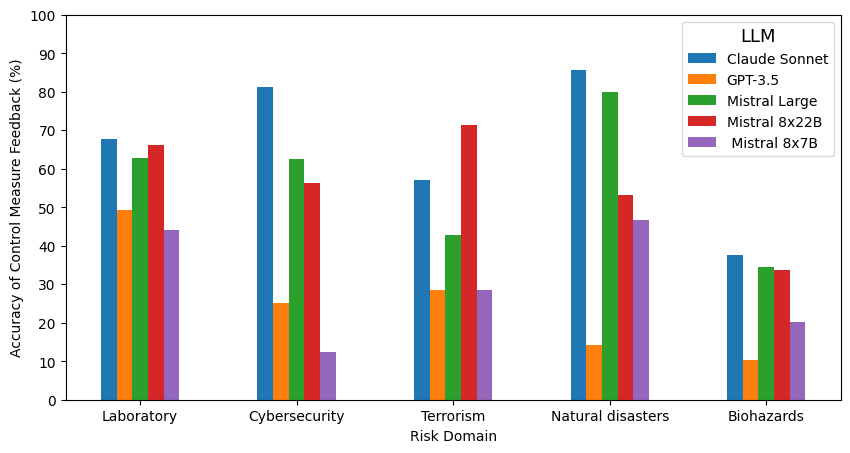

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Number of categories (rows) and series (columns)
categories = df.index
series = df.columns

# Number of categories and series
num_categories = len(categories)
num_series = len(series)

# Position of bars on x-axis
x = np.arange(num_categories)

# Bar width
bar_width = 0.1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,5))

# Plot each column (series) as a grouped bar
for i, ser in enumerate(series):
    # Position for each group
    positions = x + i * bar_width
    ax.bar(positions, df[ser], bar_width, label=ser)

# Set the position of the x ticks
ax.set_xticks(x + (num_series / 2 - 0.5) * bar_width)

# Set the labels for the x ticks
ax.set_xticklabels(categories)

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

# Set labels and title
ax.set_xlabel('Risk Domain')
ax.set_ylabel('Accuracy of Control Measure Feedback (%)')

# Add legend with title
legend = ax.legend(title='LLM')
legend.get_title().set_fontsize('13')  # Optionally set the font size of the legend title

# Show the plot
plt.show()